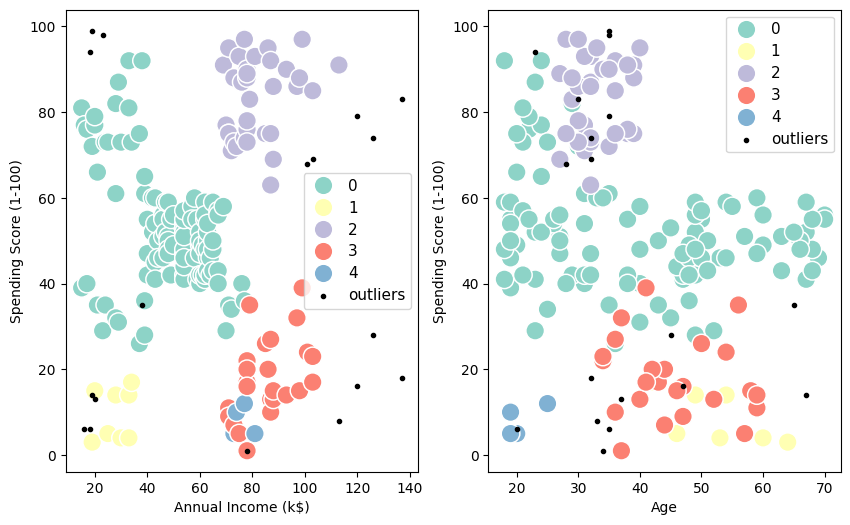

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns

df = pd.read_csv('Mall_Customers.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.describe()
df.head()
train_x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
clster = DBSCAN(eps=12.5, min_samples=4).fit(train_x)
datasetDBSCAN = train_x.copy()
datasetDBSCAN.loc[:,'cluster'] = clster.labels_
datasetDBSCAN.cluster.value_counts().to_frame()

outliers = datasetDBSCAN[datasetDBSCAN['cluster']==-1]

fig, (ax) = plt.subplots(1,2,figsize=(10,6))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',data=datasetDBSCAN[datasetDBSCAN['cluster']!=-1],hue='cluster', ax=ax[0], palette='Set3', legend='full', s=180)

sns.scatterplot(x='Age', y='Spending Score (1-100)',

   data=datasetDBSCAN[datasetDBSCAN['cluster']!=-1],

   hue='cluster', palette='Set3', ax=ax[1], legend='full', s=180)

ax[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=9, label='outliers', c="k")

ax[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=9, label='outliers', c="k")
ax[0].legend()
ax[1].legend()

plt.setp(ax[0].get_legend().get_texts(), fontsize='11')
plt.setp(ax[1].get_legend().get_texts(), fontsize='11')

plt.show()